In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

In [3]:
def scrapeTripAdvisor(driver):
    
        
    return driver

In [4]:
def init_driver():
    #driver = webdriver.Chrome()
    chromeOptions = webdriver.ChromeOptions()
    chromeOptions.add_argument('— incognito')

    prefs = {"profile.managed_default_content_settings.images":2}
    chromeOptions.add_experimental_option("prefs",prefs)
    driver = webdriver.Chrome(chrome_options=chromeOptions)
    driver.wait = WebDriverWait(driver, 25)
    return driver

In [342]:
all_headlines=[]; #the main headline
all_reviews=[];  #the text
all_ratingDates= []; # date of rating
all_ids = []; #ID of rater
all_ratings = [];

all_data= [];

def lookup(driver, query, pages):
    
    y = 0;
    
    while(y < 320):
        if(y< 1):
            driver.get(query)
            try:
                content = driver.find_element_by_css_selector('span.taLnk.ulBlueLinks');
                content.click();
                time.sleep(5);
                
                reviewIds = driver.find_elements_by_class_name('reviewSelector')
                content12 = driver.find_elements_by_css_selector('p.partial_entry');
                headline = driver.find_elements_by_css_selector('span.noQuotes')
                ratingDates = driver.find_elements_by_css_selector('span.ratingDate.relativeDate')
                baseReviews=driver.find_elements_by_css_selector('div.rating.reviewItemInline')


                allRatings = [int(c.find_element_by_xpath(".//span[contains(@class,'ui_bubble_rating')]").get_attribute("class").split(" ")[1].split("_")[1])/10 for c in baseReviews]
                ids = [t.get_attribute('data-reviewid') for t in reviewIds];
                dates = [w.get_property('title') for w in ratingDates];
                headlines = [z.text for z in headline];
                reviews = [x.text for x in content12];
                
                
                all_ratings.extend(allRatings);
                all_ids.extend(ids);
                all_headlines.extend(headlines);
                all_reviews.extend(reviews);
                all_ratingDates.extend(dates);
                
                y+=10;
                #element = driver.find_element_by_xpath("//div[@id='ui_column is-9']//div[@id='innerBubble']//div[@id='wrap']//div[@id='prw_rup prw_reviews_text_summary_hsx']//p[@id='partial_entry']]//span[@id='taLnk ulBlueLinks']")
                #element.click();

            except TimeoutException:
                print("Box or Button not found in google.com")                                  
        else:

            query = "https://www.tripadvisor.com/Restaurant_Review-g53942-d544336-Reviews-" + "or" + str(y)  + "-The_Steak_House-Wellsboro_Pennsylvania.html";
            driver.get(query)
            try:
                content = driver.find_element_by_css_selector('span.taLnk.ulBlueLinks');
                content.click();
                time.sleep(5);
                
                reviewIds = driver.find_elements_by_class_name('reviewSelector')
                content12 = driver.find_elements_by_css_selector('p.partial_entry');
                headline = driver.find_elements_by_css_selector('span.noQuotes')
                ratingDates = driver.find_elements_by_css_selector('span.ratingDate.relativeDate')
                baseReviews=driver.find_elements_by_css_selector('div.rating.reviewItemInline')


                allRatings = [int(c.find_element_by_xpath(".//span[contains(@class,'ui_bubble_rating')]").get_attribute("class").split(" ")[1].split("_")[1])/10 for c in baseReviews]
                ids = [t.get_attribute('data-reviewid') for t in reviewIds];
                dates = [w.get_property('title') for w in ratingDates];
                headlines = [z.text for z in headline];
                reviews = [x.text for x in content12];
                
                
                all_ratings.extend(allRatings);
                all_ids.extend(ids);
                all_headlines.extend(headlines);
                all_reviews.extend(reviews);
                all_ratingDates.extend(dates);
                
                y+=10;
                #element = driver.find_element_by_xpath("//div[@id='ui_column is-9']//div[@id='innerBubble']//div[@id='wrap']//div[@id='prw_rup prw_reviews_text_summary_hsx']//p[@id='partial_entry']]//span[@id='taLnk ulBlueLinks']")
                #element.click();

            except TimeoutException:
                print("Box or Button not found in google.com")
                
    all_data.extend(zip(all_ratings,all_ids,all_headlines,all_reviews,all_ratingDates));



In [343]:
driver = init_driver()
url= "https://www.tripadvisor.com/Restaurant_Review-g53942-d544336-Reviews-The_Steak_House-Wellsboro_Pennsylvania.html"
lookup(driver, url, 310)
# scrapeTripAdvisor(driver)

In [344]:
all_data[0:2]

[(5,
  u'549578126',
  u'Went here twice on the same weekend',
  u'This was our 2nd set of visits to The Steak House; we were here the last time we visited Wellsboro for one of their festival weekends. Great Food and sitting at the bar--only a few seats though--is a nice experience. Clientele/staff is friendly; Chris, the hostess, and Geoff, the bartender contribute to the friendly atmosphere...both owners, I believe. Local color at the bar. If you like bourbon, ask Geoff to make you his "smoker". Filet and prime rib were nicely prepared. Lunch during the Dicken\'s Festival was from a limited menu, but also very good. We will return every time we are in Wellsboro.',
  u'December 27, 2017'),
 (5,
  u'549086396',
  u'A Great Place to Eat on Main Street',
  u'I\'ve lived in Wellsboro for almost 10 years. We went to The Steakhouse when we first moved here and were not impressed. A couple of years ago, we "rediscovered" The Steakhouse, and I\'m glad we did because now it\'s one of our favor

In [345]:
len(all_data)

320

In [312]:
all_data[0]

(5,
 u'549578126',
 u'Went here twice on the same weekend',
 u'This was our 2nd set of visits to The Steak House; we were here the last time we visited Wellsboro for one of their festival weekends. Great Food and sitting at the bar--only a few seats though--is a nice experience. Clientele/staff is friendly; Chris, the hostess, and Geoff, the bartender contribute to the friendly atmosphere...both owners, I believe. Local color at the bar. If you like bourbon, ask Geoff to make you his "smoker". Filet and prime rib were nicely prepared. Lunch during the Dicken\'s Festival was from a limited menu, but also very good. We will return every time we are in Wellsboro.',
 u'December 27, 2017')

In [307]:
tester

5

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
import nltk
from nltk.corpus import stopwords

In [302]:
labels= ['rating', 'userId','headline', 'review','date']

In [316]:
all_data[0]

(5,
 u'549578126',
 u'Went here twice on the same weekend',
 u'This was our 2nd set of visits to The Steak House; we were here the last time we visited Wellsboro for one of their festival weekends. Great Food and sitting at the bar--only a few seats though--is a nice experience. Clientele/staff is friendly; Chris, the hostess, and Geoff, the bartender contribute to the friendly atmosphere...both owners, I believe. Local color at the bar. If you like bourbon, ask Geoff to make you his "smoker". Filet and prime rib were nicely prepared. Lunch during the Dicken\'s Festival was from a limited menu, but also very good. We will return every time we are in Wellsboro.',
 u'December 27, 2017')

In [317]:
from itertools import izip

In [318]:
zip(labels,all_data[2])

[('rating', 2),
 ('userId', u'541838431'),
 ('headline', u'Sinner'),
 ('review',
  u'Wife had salmon that tasted awful and dry. I had the black diamond steak and if was ok, a little too much garlic seasoning for my taste.'),
 ('date', u'November 18, 2017')]

In [319]:
dict(zip(labels,all_data[2]))

{'date': u'November 18, 2017',
 'headline': u'Sinner',
 'rating': 2,
 'review': u'Wife had salmon that tasted awful and dry. I had the black diamond steak and if was ok, a little too much garlic seasoning for my taste.',
 'userId': u'541838431'}

In [346]:
reviewDataDict= [dict(zip(labels,row)) for row in all_data]

In [347]:
df = pd.DataFrame.from_dict(reviewDataDict)

In [348]:
df.shape

(320, 5)

In [349]:
df.head()

,date,headline,rating,review,userId
0,"December 27, 2017",Went here twice on the same weekend,5,This was our 2nd set of visits to The Steak Ho...,549578126
1,"December 24, 2017",A Great Place to Eat on Main Street,5,I've lived in Wellsboro for almost 10 years. W...,549086396
2,"November 18, 2017",Sinner,2,Wife had salmon that tasted awful and dry. I h...,541838431
3,"November 11, 2017",Don't miss this great place !!,5,We stopped on our way to New York finger lakes...,540152359
4,"November 8, 2017",Night out,5,In town to hike the canyon and asked our hotel...,539504723


In [350]:
df['reviewLength'] = df['review'].apply(len)

In [351]:
df.head()

,date,headline,rating,review,userId,reviewLength
0,"December 27, 2017",Went here twice on the same weekend,5,This was our 2nd set of visits to The Steak Ho...,549578126,604
1,"December 24, 2017",A Great Place to Eat on Main Street,5,I've lived in Wellsboro for almost 10 years. W...,549086396,774
2,"November 18, 2017",Sinner,2,Wife had salmon that tasted awful and dry. I h...,541838431,136
3,"November 11, 2017",Don't miss this great place !!,5,We stopped on our way to New York finger lakes...,540152359,292
4,"November 8, 2017",Night out,5,In town to hike the canyon and asked our hotel...,539504723,247


In [352]:
g = sns.FacetGrid(data=df, col='rating')
g.map(plt.hist, 'reviewLength', bins=50)

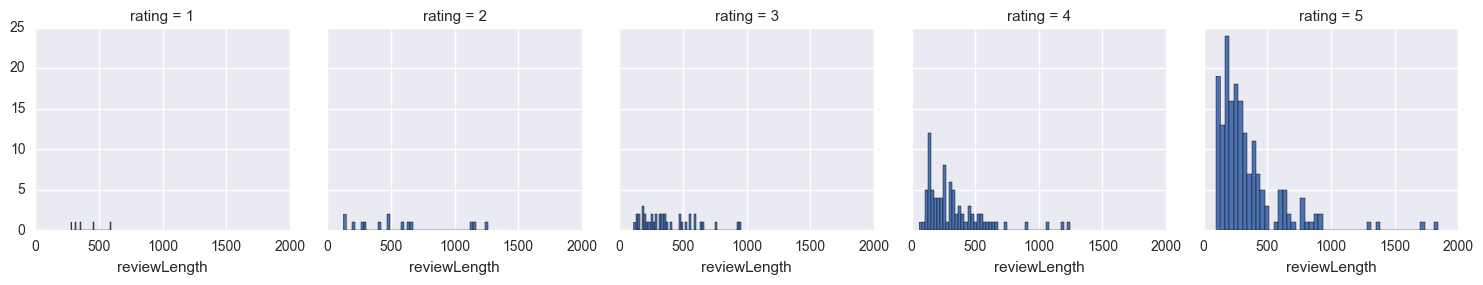

In [353]:
g.fig

In [354]:
sns.boxplot(x='rating', y='reviewLength', data=df)

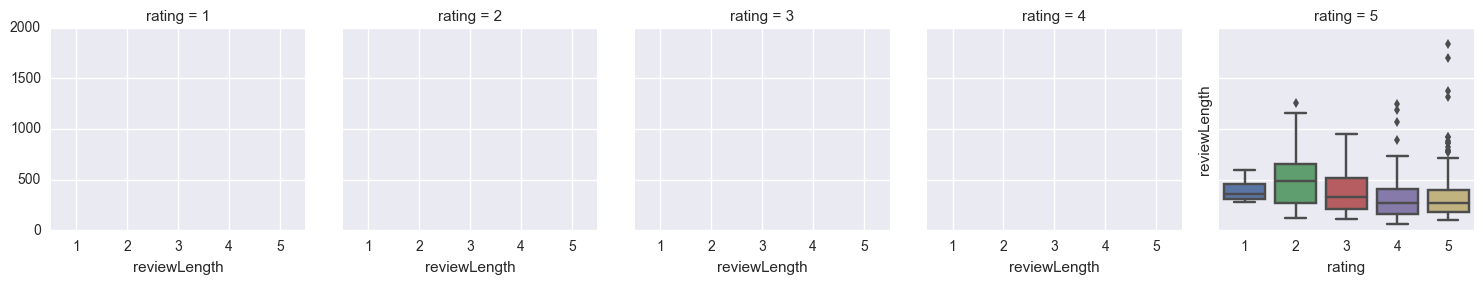

In [355]:
 sns.plt.show()

write data to file in order to not havce to scrape again

In [358]:
df.to_csv('tripAdvisorSteakhouse', sep=',')

UnicodeEncodeError: 'ascii' codec can't encode character u'\xe9' in position 322: ordinal not in range(128)

In [315]:
df= pd..from_records(all_data[0], labels);

TypeError: 'int' object is not iterable

In [ ]:
testing123=driver.find_elements_by_class_name('rating')

In [13]:
for x in testing123:
    print x.text
    

320 Reviews
4.5
320 reviews
Traveler rating
Excellent179
Very good84
Average38
Poor14
Terrible5
Reviewed 3 weeks ago
Reviewed 3 weeks ago
Reviewed November 18, 2017
via mobile
Reviewed November 11, 2017
via mobile
Reviewed November 8, 2017
via mobile
Reviewed November 3, 2017
Reviewed October 29, 2017
via mobile
Reviewed October 27, 2017
Reviewed October 21, 2017
via mobile
Reviewed October 15, 2017













In [89]:
test12345= driver.find_elements_by_xpath("//div[contains(@class,'ui_bubble_rating')]")

In [90]:
test12345

[<selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-155")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-156")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-157")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-158")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-159")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-160")>]

In [186]:
for x in test12345:
    print x.get_attribute("class")

ui_bubble_rating bubble_50
ui_bubble_rating bubble_50
ui_bubble_rating bubble_50
ui_bubble_rating bubble_40
ui_bubble_rating bubble_50
ui_bubble_rating bubble_50


In [291]:
baseReviews=driver.find_elements_by_css_selector('div.rating.reviewItemInline')
allRatings = [int(t.find_element_by_xpath(".//span[contains(@class,'ui_bubble_rating')]").get_attribute("class").split(" ")[1].split("_")[1])/10 for t in baseReviews]
allRatings

[5, 5, 2, 5, 5, 5, 5, 5, 5, 5]

In [277]:
testing12=driver.find_elements_by_css_selector('div.rating.reviewItemInline')
allRatings = [t.find_element_by_xpath(".//span[contains(@class,'ui_bubble_rating')]") for t in testing12]
[t.get_attribute("class") for t in allRatings]

[u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_20',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50']

In [132]:
testing12

[<selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-111")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-112")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-113")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-114")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-115")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-116")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-117")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d7

In [198]:
delete1 = testing12[0]

In [230]:
delete1.find_element_by_xpath("//div[contains(@class,'ui_bubble_rating')]").get_attribute("class")

u''

In [228]:
delete2 = testing12[2]

In [229]:
delete2

<selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-113")>

In [227]:
delete2.find_element_by_xpath("//div[contains(@class,'ui_bubble_rating')]").get_attribute("class")

u'ui_bubble_rating bubble_50'

In [184]:
ratings = [t.find_element_by_xpath("//div[contains(@class,'ui_bubble_rating')]") for t in testing12];

In [185]:
ratings

[<selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-155")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-155")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-155")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-155")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-155")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-155")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d73ad589926", element="0.6144377076088712-155")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7caadf06b3627f6e7cde0d7

In [161]:
ratings = [t.find_element_by_xpath("//div[contains(@class,'ui_bubble_rating')]").get_attribute("class").split(" ")[1] for t in testing12];

In [162]:
ratings

[u'bubble_50',
 u'bubble_50',
 u'bubble_50',
 u'bubble_50',
 u'bubble_50',
 u'bubble_50',
 u'bubble_50',
 u'bubble_50',
 u'bubble_50',
 u'bubble_50']

In [187]:
onlyOne = testing12[0]

In [188]:
onlyOne.get_attribute("class")

u'rating reviewItemInline'

In [252]:
z= onlyOne.find_element_by_xpath("//span[contains(@class,'ui_bubble_rating')]")

In [253]:
z.get_attribute("class")

u'ui_bubble_rating bubble_45'

In [275]:
allRatings = [t.find_element_by_xpath(".//span[contains(@class,'ui_bubble_rating')]") for t in testing12]

In [276]:
[t.get_attribute("class") for t in allRatings]

[u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_20',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50',
 u'ui_bubble_rating bubble_50']

In [181]:
theRating= z.get_attribute("class");

In [182]:
second= theRating.split(" ")[1]

In [183]:
second

u'bubble_50'

In [123]:
for item in z:
    print item.get_attribute("class")

TypeError: 'WebElement' object is not iterable

In [92]:
for x in testing12:
    print x.text

Reviewed 3 weeks ago
Reviewed 3 weeks ago
Reviewed November 18, 2017
via mobile
Reviewed November 11, 2017
via mobile
Reviewed November 8, 2017
via mobile
Reviewed November 3, 2017
Reviewed October 29, 2017
via mobile
Reviewed October 27, 2017
Reviewed October 21, 2017
via mobile
Reviewed October 15, 2017


In [269]:
for x in testing12:
    z= x.find_elements_by_xpath("//div[contains(@class,'reviewItemInline')]")
    for item in z:
        print item.text
        print item.get_attribute("class")
        print item.find_element_by_xpath(".//span[contains(@class,'ui_bubble_rating')]").get_attribute("class")

Reviewed 3 weeks ago
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed 3 weeks ago
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed November 18, 2017
via mobile
rating reviewItemInline
ui_bubble_rating bubble_20
Reviewed November 11, 2017
via mobile
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed November 8, 2017
via mobile
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed November 3, 2017
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed October 29, 2017
via mobile
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed October 27, 2017
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed October 21, 2017
via mobile
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed October 15, 2017
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed 3 weeks ago
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed 3 weeks ago
rating reviewItemInline
ui_bubble_rating bubble_50
Reviewed November 18, 2017
via mobile
r

In [65]:
y= testing12.find_elements_by_css_selector("*")

AttributeError: 'list' object has no attribute 'find_elements_by_css_selector'

In [ ]:
login_form = driver.find_element_by_xpath("//form[@id='loginForm']")


In [76]:
all_reviews[0]a

u'This was our 2nd set of visits to The Steak House; we were here the last time we visited Wellsboro for one of their festival weekends. Great Food and sitting at the bar--only a few seats though--is a nice experience. Clientele/staff is friendly; Chris, the hostess, and Geoff, the bartender contribute to the friendly atmosphere...both owners, I believe. Local color at the bar. If you like bourbon, ask Geoff to make you his "smoker". Filet and prime rib were nicely prepared. Lunch during the Dicken\'s Festival was from a limited menu, but also very good. We will return every time we are in Wellsboro.'

In [77]:
all_headlines[0]

u'Went here twice on the same weekend'

In [80]:
all_ratingDates

[]

In [59]:
from nltk.corpus import stopwords

In [248]:
ratingsFirst = driver.find_elements_by_css_selector('div.rating.reviewItemInline')

In [249]:
ratingsFirst[2].text

u'Reviewed November 18, 2017\nvia mobile'

In [243]:
ratingsFirst[2].get_attribute("class")

u'rating reviewItemInline'

In [270]:
test0=ratingsFirst[2].find_element_by_xpath(".//span[contains(@class,'ui_bubble_rating')]")

In [271]:
test0.get_attribute("class")

u'ui_bubble_rating bubble_20'